In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from numpy import loadtxt
from numpy import sort
import matplotlib.pyplot as plt
import numpy as np
import io
import requests

In [ ]:

df = pd.read_csv('./spam_email.csv', sep='\s+', engine='python', header=0)
df.rename(columns={'#a':'a'}, inplace=True)
df.head()

,make,address,all,3d,our,over,remove,internet,order,mail,...,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total,Class
0,0.00,0.00,0.29,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.178,0.0,0.044,0.000,0.00,1.666,10,180,ham
1,0.46,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.125,0.0,0.000,0.000,0.00,1.510,10,74,ham
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.000,0.000,0.00,1.718,11,55,ham
3,0.33,0.44,0.37,0.0,0.14,0.11,0.00,0.07,0.97,1.16,...,0.006,0.159,0.0,0.069,0.221,0.11,3.426,72,819,spam
4,0.00,2.08,0.00,0.0,3.12,0.00,1.04,0.00,0.00,0.00,...,0.000,0.000,0.0,0.263,0.000,0.00,1.428,4,20,spam


In [ ]:
def compute_impurity(feature, impurity_criterion):
    probs = feature.value_counts(normalize=True)
    if impurity_criterion == 'entropy':
        impurity = -1 * np.sum(np.log2(probs) * probs)
    elif impurity_criterion == 'gini':
        impurity = 1 - np.sum(np.square(probs))
    else:
        raise ValueError('Unknown impurity criterion')
        return(round(impurity, 3))

In [ ]:
def comp_feature_information_gain(df, target, descriptive_feature, split_criterion):
    print('target feature:', target)
    print('descriptive_feature:', descriptive_feature)
    print('split criterion:', split_criterion)
        
    target_entropy = compute_impurity(df[target], split_criterion)
    entropy_list = list()
    weight_list = list()
    for level in df[descriptive_feature].unique():
        df_feature_level = df[df[descriptive_feature] == level]
        entropy_level = compute_impurity(df_feature_level[target], split_criterion)
        entropy_list.append(round(entropy_level, 3))
        weight_level = len(df_feature_level) / len(df)
        weight_list.append(round(weight_level, 3))
    print('impurity of partitions:', entropy_list)
    print('weights of partitions:', weight_list)
    feature_remaining_impurity = np.sum(np.array(entropy_list) * np.array(weight_list))
    print('remaining impurity:', feature_remaining_impurity)
    information_gain = target_entropy - feature_remaining_impurity
    print('information gain:', information_gain)
    print('====================')
    return(information_gain)

In [ ]:
df['Class'].value_counts()

ham     2788
spam    1813
Name: Class, dtype: int64

In [ ]:

split_criteria = 'gini'
for feature in df.drop(columns='Class').columns:
    feature_info_gain = comp_feature_information_gain(df, 'Class', feature, split_criteria)

target feature: Class
descriptive_feature: make
split criterion: gini


TypeError: ignored

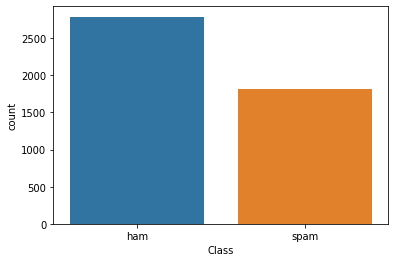

In [ ]:
import seaborn as sns
sns.countplot(x=df['Class'],data=df)